<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/12thWeekTasks/CNN_on_Cifat10_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

100%|██████████| 170M/170M [00:01<00:00, 102MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10 | Train Accuracy: 51.63% | Test Accuracy: 63.35%
Epoch 2/10 | Train Accuracy: 65.95% | Test Accuracy: 67.14%
Epoch 3/10 | Train Accuracy: 71.76% | Test Accuracy: 70.62%
Epoch 4/10 | Train Accuracy: 75.63% | Test Accuracy: 70.67%
Epoch 5/10 | Train Accuracy: 79.08% | Test Accuracy: 71.31%
Epoch 6/10 | Train Accuracy: 82.70% | Test Accuracy: 71.51%
Epoch 7/10 | Train Accuracy: 85.54% | Test Accuracy: 71.57%
Epoch 8/10 | Train Accuracy: 88.35% | Test Accuracy: 71.81%
Epoch 9/10 | Train Accuracy: 90.89% | Test Accuracy: 71.50%
Epoch 10/10 | Train Accuracy: 92.79% | Test Accuracy: 70.96%


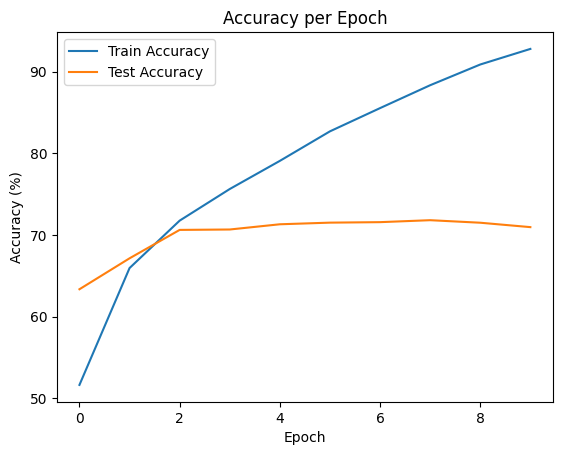

In [ ]:


# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function
def train_model(model, optimizer, criterion, train_loader, test_loader, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        test_accuracy = 100. * correct / total
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%")

    return train_accuracies, test_accuracies

# Main Execution
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model(model, optimizer, criterion, train_loader, test_loader, epochs=10)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


Training model with kernel size 3x3
Epoch 1/10 | Train Accuracy: 52.70% | Test Accuracy: 63.61%
Epoch 2/10 | Train Accuracy: 66.40% | Test Accuracy: 65.96%
Epoch 3/10 | Train Accuracy: 71.87% | Test Accuracy: 70.80%
Epoch 4/10 | Train Accuracy: 75.74% | Test Accuracy: 72.26%
Epoch 5/10 | Train Accuracy: 78.91% | Test Accuracy: 72.22%
Epoch 6/10 | Train Accuracy: 82.17% | Test Accuracy: 71.92%
Epoch 7/10 | Train Accuracy: 85.14% | Test Accuracy: 72.85%
Epoch 8/10 | Train Accuracy: 87.69% | Test Accuracy: 72.97%
Epoch 9/10 | Train Accuracy: 90.34% | Test Accuracy: 72.02%
Epoch 10/10 | Train Accuracy: 92.57% | Test Accuracy: 72.09%
Training model with kernel size 5x5
Epoch 1/10 | Train Accuracy: 52.32% | Test Accuracy: 60.46%
Epoch 2/10 | Train Accuracy: 67.27% | Test Accuracy: 69.38%
Epoch 3/10 | Train Accuracy: 73.18% | Test Accuracy: 71.21%
Epoch 4/10 | Train Accuracy: 77.45% | Test Accuracy: 71.31%
Epoch 5/10 | Train Accuracy: 81.10% | Test Accuracy: 72.51%
Epoch 6/10 | Train Accuracy

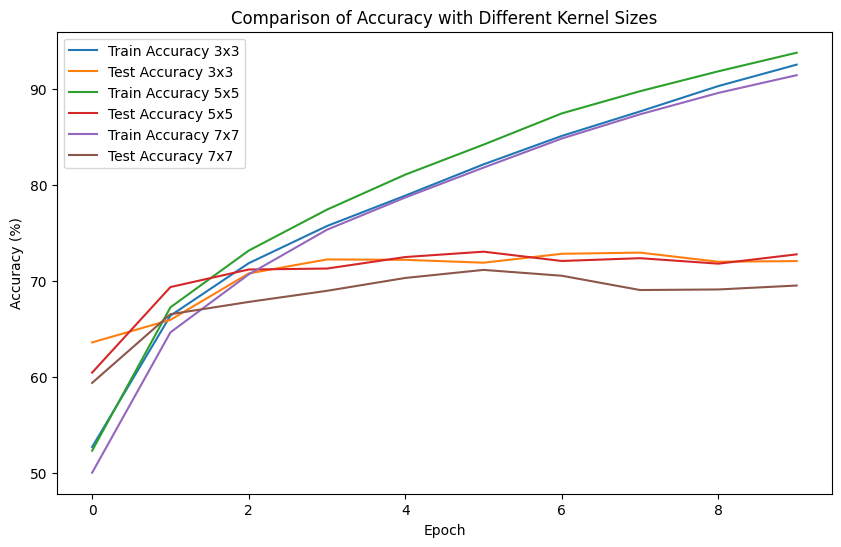

In [ ]:
# Define CNN Model with Variable Kernel Size
class CNNWithKernel(nn.Module):
    def __init__(self, kernel_size=3):
        super(CNNWithKernel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=kernel_size//2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=kernel_size//2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to Train and Compare Models with Different Kernel Sizes
def compare_kernel_sizes(kernel_sizes=[3, 5, 7], epochs=10):
    results = {}

    for kernel_size in kernel_sizes:
        print(f"Training model with kernel size {kernel_size}x{kernel_size}")

        model = CNNWithKernel(kernel_size=kernel_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        train_accuracies, test_accuracies = train_model(model, optimizer, criterion, train_loader, test_loader, epochs)

        results[kernel_size] = {
            'train_accuracies': train_accuracies,
            'test_accuracies': test_accuracies
        }

    return results

# Main Execution: Compare Kernel Sizes
kernel_sizes = [3, 5, 7]
results = compare_kernel_sizes(kernel_sizes, epochs=10)

# Plot Results for Comparison
plt.figure(figsize=(10,6))
for kernel_size in kernel_sizes:
    plt.plot(results[kernel_size]['train_accuracies'], label=f'Train Accuracy {kernel_size}x{kernel_size}')
    plt.plot(results[kernel_size]['test_accuracies'], label=f'Test Accuracy {kernel_size}x{kernel_size}')

plt.title('Comparison of Accuracy with Different Kernel Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [8]:
# Define CNN Model with Variable Pooling
class CNNWithPooling(nn.Module):
    def __init__(self, pooling_type="max"):
        super(CNNWithPooling, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Choose pooling type
        if pooling_type == "max":
            self.pool = nn.MaxPool2d(2, 2)
        elif pooling_type == "avg":
            self.pool = nn.AvgPool2d(2, 2)
        else:
            raise ValueError("Pooling type must be either 'max' or 'avg'")

        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [7]:
def compare_pooling_types(pooling_types=["max", "avg"], epochs=10):
    results = {}

    for pooling_type in pooling_types:
        print(f"Training model with {pooling_type} pooling")

        model = CNNWithPooling(pooling_type=pooling_type)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        train_accuracies, test_accuracies = train_model(model, optimizer, criterion, train_loader, test_loader, epochs)

        results[pooling_type] = {
            'train_accuracies': train_accuracies,
            'test_accuracies': test_accuracies
        }

    return results


In [6]:
def train_model(model, optimizer, criterion, train_loader, test_loader, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        test_accuracy = 100. * correct / total
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%")

    return train_accuracies, test_accuracies


In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:18<00:00, 9.11MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Training model with max pooling
Epoch 1/10 | Train Accuracy: 51.92% | Test Accuracy: 60.69%
Epoch 2/10 | Train Accuracy: 65.88% | Test Accuracy: 68.53%
Epoch 3/10 | Train Accuracy: 71.85% | Test Accuracy: 69.73%
Epoch 4/10 | Train Accuracy: 75.68% | Test Accuracy: 69.64%
Epoch 5/10 | Train Accuracy: 79.30% | Test Accuracy: 71.47%
Epoch 6/10 | Train Accuracy: 82.54% | Test Accuracy: 72.44%
Epoch 7/10 | Train Accuracy: 85.58% | Test Accuracy: 72.17%
Epoch 8/10 | Train Accuracy: 88.77% | Test Accuracy: 71.04%
Epoch 9/10 | Train Accuracy: 90.80% | Test Accuracy: 71.83%
Epoch 10/10 | Train Accuracy: 93.24% | Test Accuracy: 71.21%
Training model with avg pooling
Epoch 1/10 | Train Accuracy: 47.75% | Test Accuracy: 56.27%
Epoch 2/10 | Train Accuracy: 60.44% | Test Accuracy: 62.19%
Epoch 3/10 | Train Accuracy: 66.53% | Test Accuracy: 65.89%
Epoch 4/10 | Train Accuracy: 70.70% | Test Accuracy: 66.70%
Epoch 5/10 | Train Accuracy: 74.28% | Test Accuracy: 70.26%
Epoch 6/10 | Train Accuracy: 77.35%

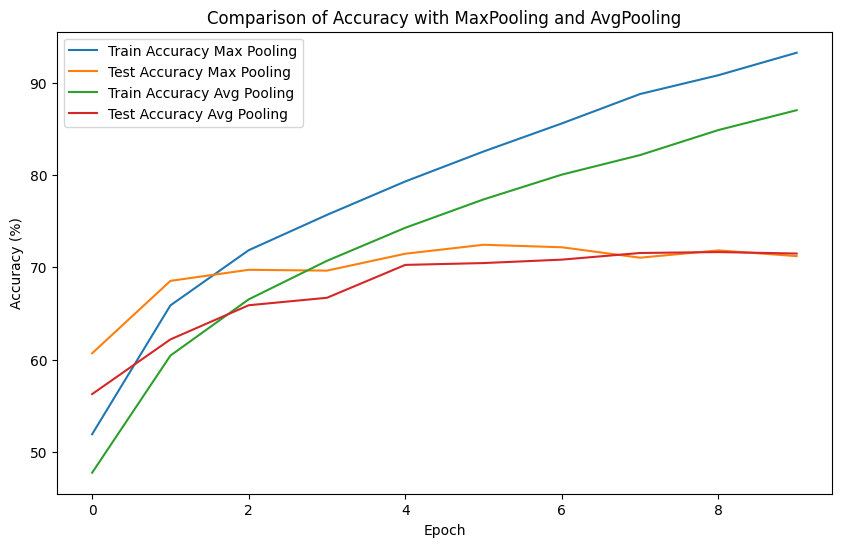

In [10]:
# Define CNN Model with Variable Pooling
class CNNWithPooling(nn.Module):
    def __init__(self, pooling_type="max"):
        super(CNNWithPooling, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        if pooling_type == "max":
            self.pool = nn.MaxPool2d(2, 2)
        elif pooling_type == "avg":
            self.pool = nn.AvgPool2d(2, 2)
        else:
            raise ValueError("Pooling type must be either 'max' or 'avg'")
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Compare MaxPooling and AvgPooling
def compare_pooling_types(pooling_types=["max", "avg"], epochs=10):
    results = {}
    for pooling_type in pooling_types:
        print(f"Training model with {pooling_type} pooling")
        model = CNNWithPooling(pooling_type=pooling_type)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        train_accuracies, test_accuracies = train_model(model, optimizer, criterion, train_loader, test_loader, epochs)
        results[pooling_type] = {
            'train_accuracies': train_accuracies,
            'test_accuracies': test_accuracies
        }
    return results

# Execute Comparison
pooling_types = ["max", "avg"]
results_pooling = compare_pooling_types(pooling_types, epochs=10)

# Plot Results for Comparison
plt.figure(figsize=(10, 6))
for pooling_type in pooling_types:
    plt.plot(results_pooling[pooling_type]['train_accuracies'], label=f'Train Accuracy {pooling_type.capitalize()} Pooling')
    plt.plot(results_pooling[pooling_type]['test_accuracies'], label=f'Test Accuracy {pooling_type.capitalize()} Pooling')

plt.title('Comparison of Accuracy with MaxPooling and AvgPooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()




In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:08<00:00, 20.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5 | Train Acc: 51.88% | Test Acc: 61.90% | Test Loss: 1.0792
Epoch 2/5 | Train Acc: 65.65% | Test Acc: 67.34% | Test Loss: 0.9280
Epoch 3/5 | Train Acc: 71.49% | Test Acc: 69.84% | Test Loss: 0.8610
Epoch 4/5 | Train Acc: 74.86% | Test Acc: 71.77% | Test Loss: 0.8157
Epoch 5/5 | Train Acc: 78.72% | Test Acc: 71.91% | Test Loss: 0.8084


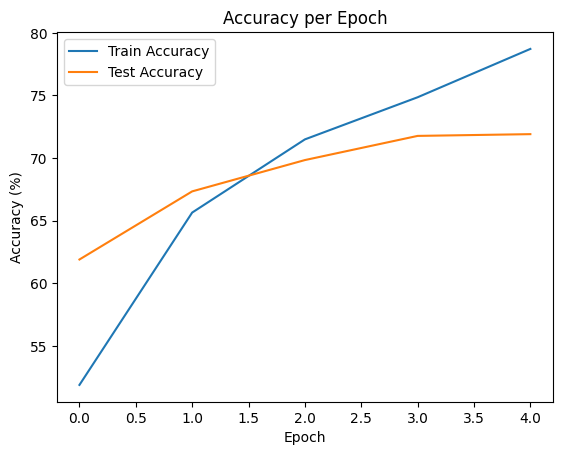

In [6]:
# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function with Early Stopping and Scheduler
def train_model_with_callbacks(model, optimizer, criterion, train_loader, test_loader, epochs, patience):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

    train_accuracies, test_accuracies = [], []
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)
        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        running_loss, correct, total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        test_accuracy = 100. * correct / total
        test_accuracies.append(test_accuracy)
        test_loss = running_loss / len(test_loader)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_accuracy:.2f}% | Test Acc: {test_accuracy:.2f}% | Test Loss: {test_loss:.4f}")

        # Scheduler and Early Stopping
        scheduler.step(test_loss)
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    return train_accuracies, test_accuracies

# Main Execution: Train with 5 Epochs
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model_with_callbacks(
    model, optimizer, criterion, train_loader, test_loader, epochs=5, patience=3
)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

Epoch 1/50 | Train Acc: 52.14% | Test Acc: 59.88% | Test Loss: 1.1357
Epoch 2/50 | Train Acc: 65.35% | Test Acc: 67.40% | Test Loss: 0.9294
Epoch 3/50 | Train Acc: 70.89% | Test Acc: 68.18% | Test Loss: 0.9147
Epoch 4/50 | Train Acc: 74.90% | Test Acc: 70.93% | Test Loss: 0.8486
Epoch 5/50 | Train Acc: 78.61% | Test Acc: 72.21% | Test Loss: 0.8205
Epoch 6/50 | Train Acc: 81.91% | Test Acc: 70.83% | Test Loss: 0.9014
Epoch 7/50 | Train Acc: 84.96% | Test Acc: 71.37% | Test Loss: 0.9001
Epoch 8/50 | Train Acc: 88.01% | Test Acc: 70.89% | Test Loss: 1.0210
Epoch 9/50 | Train Acc: 90.33% | Test Acc: 70.75% | Test Loss: 1.0660
Epoch 10/50 | Train Acc: 92.08% | Test Acc: 71.19% | Test Loss: 1.1551
Epoch 11/50 | Train Acc: 94.04% | Test Acc: 70.68% | Test Loss: 1.3115
Epoch 12/50 | Train Acc: 98.00% | Test Acc: 72.48% | Test Loss: 1.3037
Epoch 13/50 | Train Acc: 98.86% | Test Acc: 72.39% | Test Loss: 1.3487
Epoch 14/50 | Train Acc: 99.21% | Test Acc: 72.27% | Test Loss: 1.3907
Epoch 15/50 | T

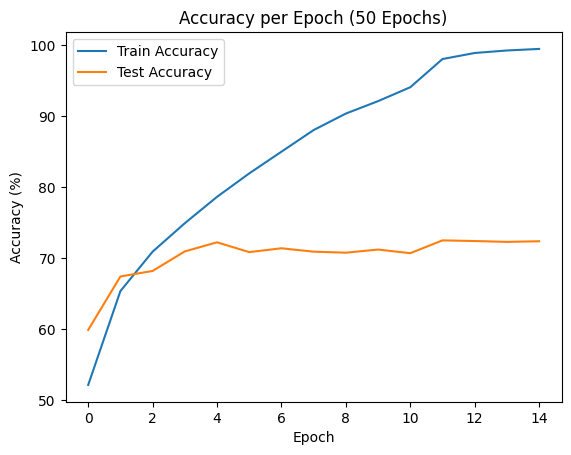

In [7]:
# Main Execution: Train with 50 Epochs
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model_with_callbacks(
    model, optimizer, criterion, train_loader, test_loader, epochs=50, patience=10
)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch (50 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


Epoch 1/100 | Train Acc: 51.25% | Test Acc: 61.07% | Test Loss: 1.0877
Epoch 2/100 | Train Acc: 65.81% | Test Acc: 66.64% | Test Loss: 0.9336
Epoch 3/100 | Train Acc: 71.63% | Test Acc: 69.38% | Test Loss: 0.8679
Epoch 4/100 | Train Acc: 75.42% | Test Acc: 69.79% | Test Loss: 0.8655
Epoch 5/100 | Train Acc: 78.98% | Test Acc: 72.22% | Test Loss: 0.8293
Epoch 6/100 | Train Acc: 81.84% | Test Acc: 71.34% | Test Loss: 0.8727
Epoch 7/100 | Train Acc: 84.83% | Test Acc: 72.40% | Test Loss: 0.9106
Epoch 8/100 | Train Acc: 87.92% | Test Acc: 71.54% | Test Loss: 0.9663
Epoch 9/100 | Train Acc: 90.03% | Test Acc: 72.00% | Test Loss: 1.0267
Epoch 10/100 | Train Acc: 92.13% | Test Acc: 71.06% | Test Loss: 1.1610
Epoch 11/100 | Train Acc: 94.00% | Test Acc: 70.99% | Test Loss: 1.2858
Epoch 12/100 | Train Acc: 98.07% | Test Acc: 72.86% | Test Loss: 1.2787
Epoch 13/100 | Train Acc: 98.94% | Test Acc: 73.37% | Test Loss: 1.3223
Epoch 14/100 | Train Acc: 99.25% | Test Acc: 72.94% | Test Loss: 1.3608
E

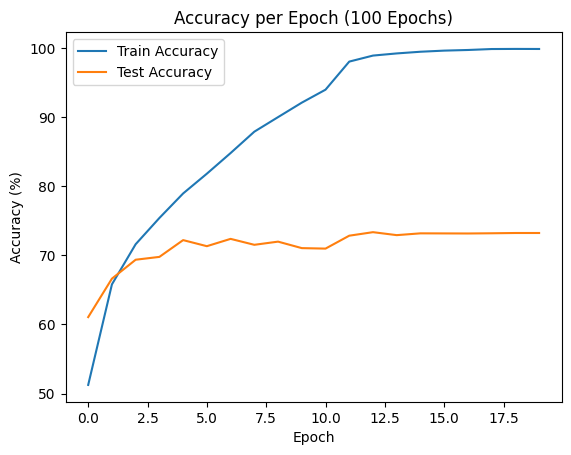

In [9]:
# Main Execution: Train with 100 Epochs
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model_with_callbacks(
    model, optimizer, criterion, train_loader, test_loader, epochs=100, patience=15
)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch (100 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


Epoch 1/250 | Train Acc: 50.73% | Test Acc: 60.35% | Test Loss: 1.1176
Epoch 2/250 | Train Acc: 65.48% | Test Acc: 66.51% | Test Loss: 0.9508
Epoch 3/250 | Train Acc: 70.88% | Test Acc: 69.43% | Test Loss: 0.8789
Epoch 4/250 | Train Acc: 74.33% | Test Acc: 72.02% | Test Loss: 0.8232
Epoch 5/250 | Train Acc: 77.45% | Test Acc: 71.49% | Test Loss: 0.8379
Epoch 6/250 | Train Acc: 80.44% | Test Acc: 71.97% | Test Loss: 0.8384
Epoch 7/250 | Train Acc: 83.12% | Test Acc: 72.55% | Test Loss: 0.8592
Epoch 8/250 | Train Acc: 85.35% | Test Acc: 72.52% | Test Loss: 0.8930
Epoch 9/250 | Train Acc: 87.75% | Test Acc: 71.54% | Test Loss: 0.9882
Epoch 10/250 | Train Acc: 89.82% | Test Acc: 71.39% | Test Loss: 1.0943
Epoch 11/250 | Train Acc: 95.56% | Test Acc: 73.12% | Test Loss: 1.0780
Epoch 12/250 | Train Acc: 96.62% | Test Acc: 72.93% | Test Loss: 1.1086
Epoch 13/250 | Train Acc: 97.16% | Test Acc: 72.83% | Test Loss: 1.1466
Epoch 14/250 | Train Acc: 97.48% | Test Acc: 72.67% | Test Loss: 1.1753
E

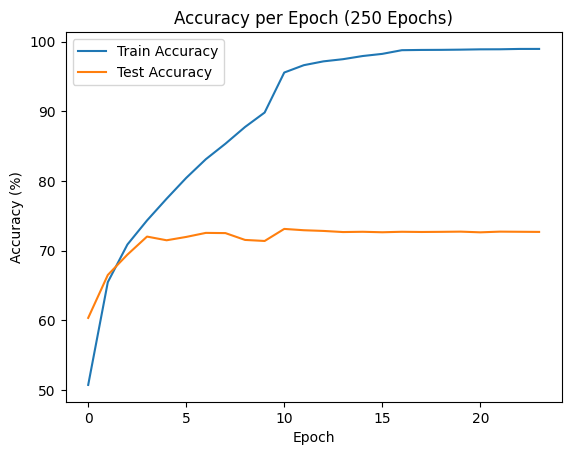

In [10]:
# Main Execution: Train with 250 Epochs
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model_with_callbacks(
    model, optimizer, criterion, train_loader, test_loader, epochs=250, patience=20
)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch (250 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [4]:
# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [5]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

def train_model_with_callbacks(model, optimizer, criterion, train_loader, test_loader, epochs, patience):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
    best_loss = float('inf')
    patience_counter = 0

    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total, train_loss = 0, 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct, total, val_loss = 0, 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        test_accuracy = 100. * correct / total
        test_accuracies.append(test_accuracy)

        avg_val_loss = val_loss / len(test_loader)
        scheduler.step(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} | Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}% | Val Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    return train_accuracies, test_accuracies


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/350 | Train Accuracy: 51.66% | Test Accuracy: 61.95% | Val Loss: 1.0803
Epoch 2/350 | Train Accuracy: 65.77% | Test Accuracy: 66.50% | Val Loss: 0.9601
Epoch 3/350 | Train Accuracy: 71.16% | Test Accuracy: 68.77% | Val Loss: 0.8916
Epoch 4/350 | Train Accuracy: 75.57% | Test Accuracy: 69.78% | Val Loss: 0.8781
Epoch 5/350 | Train Accuracy: 78.76% | Test Accuracy: 72.56% | Val Loss: 0.8159
Epoch 6/350 | Train Accuracy: 81.96% | Test Accuracy: 72.44% | Val Loss: 0.8365
Epoch 7/350 | Train Accuracy: 85.11% | Test Accuracy: 72.35% | Val Loss: 0.8927
Epoch 8/350 | Train Accuracy: 87.73% | Test Accuracy: 72.79% | Val Loss: 0.9233
Epoch 9/350 | Train Accuracy: 90.36% | Test Accuracy: 72.09% | Val Loss: 1.0782
Epoch 10/350 | Train Accuracy: 92.36% | Test Accuracy: 71.59% | Val Loss: 1.1469
Epoch 11/350 | Train Accuracy: 94.10% | Test Accuracy: 70.96% | Val Loss: 1.3171
Epoch 12/350 | Train Accuracy: 98.24% | Test Accuracy: 73.20% | Val Loss: 1.2705
Epoch 13/350 | Train Accuracy: 99.06%

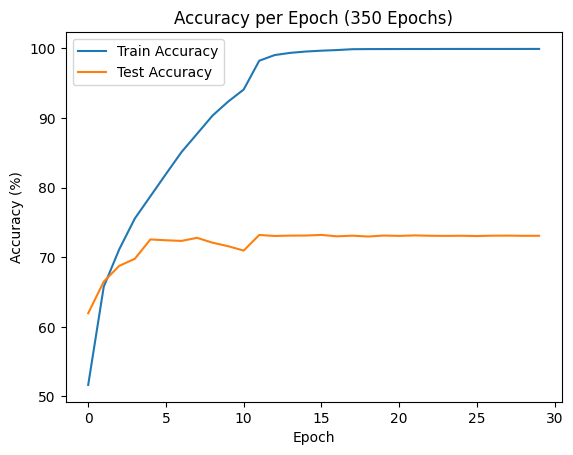

In [13]:
# Main Execution: Train with 350 Epochs
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies, test_accuracies = train_model_with_callbacks(
    model, optimizer, criterion, train_loader, test_loader, epochs=350, patience=25
)

# Plot Results
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch (350 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


Training with SGD optimizer


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 | Train Accuracy: 44.30% | Test Accuracy: 57.64% | Val Loss: 1.1832
Epoch 2/50 | Train Accuracy: 61.85% | Test Accuracy: 64.58% | Val Loss: 1.0084
Epoch 3/50 | Train Accuracy: 69.02% | Test Accuracy: 69.49% | Val Loss: 0.8728
Epoch 4/50 | Train Accuracy: 73.86% | Test Accuracy: 70.04% | Val Loss: 0.8627
Epoch 5/50 | Train Accuracy: 78.00% | Test Accuracy: 70.80% | Val Loss: 0.8684
Epoch 6/50 | Train Accuracy: 82.05% | Test Accuracy: 72.63% | Val Loss: 0.8310
Epoch 7/50 | Train Accuracy: 85.37% | Test Accuracy: 73.21% | Val Loss: 0.8771
Epoch 8/50 | Train Accuracy: 88.82% | Test Accuracy: 72.01% | Val Loss: 0.9738
Epoch 9/50 | Train Accuracy: 91.51% | Test Accuracy: 71.70% | Val Loss: 1.0823
Epoch 10/50 | Train Accuracy: 93.90% | Test Accuracy: 72.42% | Val Loss: 1.1748
Epoch 11/50 | Train Accuracy: 95.47% | Test Accuracy: 72.06% | Val Loss: 1.3081
Epoch 12/50 | Train Accuracy: 95.82% | Test Accuracy: 71.37% | Val Loss: 1.3292
Epoch 13/50 | Train Accuracy: 99.05% | Test Accur

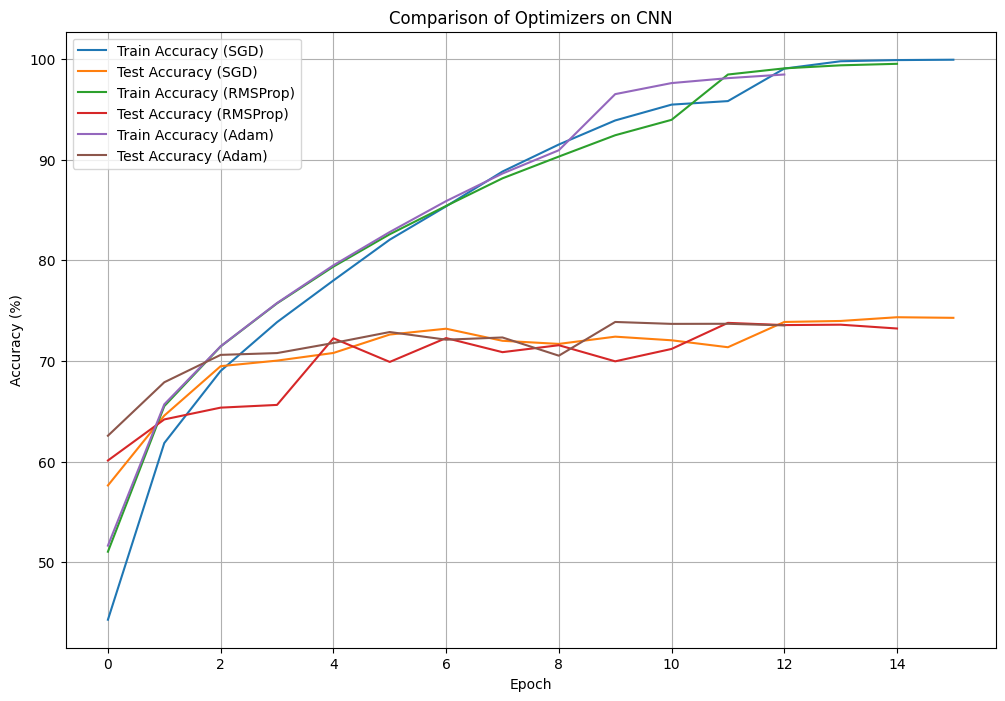

In [8]:
# Function to Train and Compare Optimizers
def compare_optimizers(optimizers, epochs=10, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    results = {}

    for optimizer_name in optimizers:
        print(f"Training with {optimizer_name} optimizer")

        # Initialize model and criterion
        model = CNN()
        criterion = nn.CrossEntropyLoss()
        model.to(device)

        # Initialize optimizer
        if optimizer_name == "SGD":
            optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        elif optimizer_name == "RMSProp":
            optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
        elif optimizer_name == "Adam":
            optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train model with early stopping and learning rate scheduler
        train_accuracies, test_accuracies = train_model_with_callbacks(
            model, optimizer, criterion, train_loader, test_loader, epochs, patience
        )

        # Store results
        results[optimizer_name] = {
            "train_accuracies": train_accuracies,
            "test_accuracies": test_accuracies
        }

    return results

# Define optimizer list
optimizers = ["SGD", "RMSProp", "Adam"]

# Compare Optimizers
results_optimizers = compare_optimizers(optimizers, epochs=50, patience=10)

# Plot Results for Comparison
plt.figure(figsize=(12, 8))
for optimizer_name in optimizers:
    plt.plot(results_optimizers[optimizer_name]['train_accuracies'], label=f'Train Accuracy ({optimizer_name})')
    plt.plot(results_optimizers[optimizer_name]['test_accuracies'], label=f'Test Accuracy ({optimizer_name})')

plt.title('Comparison of Optimizers on CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.show()
